Run second

### Generowanie wykresów porównujących sześć modeli pod względem AUC oraz czasu trwania uczenia

Import niezbędnych bibliotek, definicja ustawień logowania i stałych

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from os.path import dirname, join, abspath
import sys
sys.path.insert(0, abspath(join(dirname('recommender_system'), '..')))

from src.utils.helper import (
    get_newest_existing_model_version,
    unpickle
)

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

BASE_PATH = abspath(join(dirname('recommender_system'), '../../..'))
RESULTS_PATH = f'{BASE_PATH}/results'

Generowanie wykresu porównującego miarę AUC dla czterech modeli

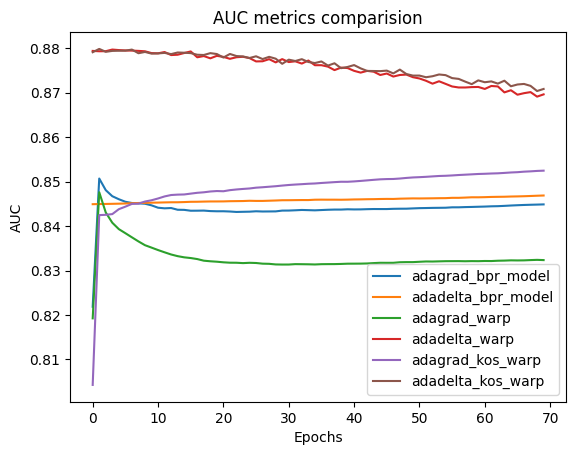

In [3]:
# AUC metrics comparision
model_name = 'adagrad_bpr_model'
model_results_path = f'{RESULTS_PATH}/{model_name}'
version = get_newest_existing_model_version(model_results_path)
adagrad_bpr_model_auc = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl'))

model_name = 'adadelta_bpr_model'
adadelta_bpr_model_auc = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl'))

model_name = 'adagrad_warp_model'
adagrad_warp_model_auc = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl'))

model_name = 'adadelta_warp_model'
adadelta_warp_model_auc = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl'))

model_name = 'adagrad_kos_warp_model'
adagrad_kos_warp_model_auc = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl'))

model_name = 'adadelta_kos_warp_model'
adadelta_kos_warp_model_auc = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl'))

x = np.arange(len(adagrad_warp_model_auc))
plt.title("AUC metrics comparision")
plt.plot(x, adagrad_bpr_model_auc)
plt.plot(x, adadelta_bpr_model_auc)
plt.plot(x, adagrad_warp_model_auc)
plt.plot(x, adadelta_warp_model_auc)
plt.plot(x, adagrad_kos_warp_model_auc)
plt.plot(x, adadelta_kos_warp_model_auc)
plt.legend(['adagrad_bpr_model', 'adadelta_bpr_model', 'adagrad_warp', 'adadelta_warp', 'adagrad_kos_warp', 'adadelta_kos_warp'], loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.show()

Max AUC

In [34]:
models_avg = {
    'Adagrad BPR model': max(adagrad_bpr_model_auc),
    'Adadelta BPR model': max(adadelta_bpr_model_auc),
    'Adagrad WARP model': max(adagrad_warp_model_auc),
    'Adadelta WARP model': max(adadelta_warp_model_auc),
    'Adagrad k-OS WARP model': max(adagrad_kos_warp_model_auc),
    'Adadelta k-OS WARP model': max(adadelta_kos_warp_model_auc),
}

df = pd.DataFrame().from_dict(
                        data=models_avg,
                        columns=['max AUC'],
                        orient='index'
                    ).sort_values(by=['max AUC'], ascending=False)

print(df)


                           max AUC
Adadelta k-OS WARP model  0.879869
Adadelta WARP model       0.879724
Adagrad k-OS WARP model   0.852475
Adagrad BPR model         0.850706
Adagrad WARP model        0.847618
Adadelta BPR model        0.846886


Average AUC

In [33]:
models_avg = {
    'Adagrad BPR model': np.average(adagrad_bpr_model_auc),
    'Adadelta BPR model': np.average(adadelta_bpr_model_auc),
    'Adagrad WARP model': np.average(adagrad_warp_model_auc),
    'Adadelta WARP model': np.average(adadelta_warp_model_auc),
    'Adagrad k-OS WARP model': np.average(adagrad_kos_warp_model_auc),
    'Adadelta k-OS WARP model': np.average(adadelta_kos_warp_model_auc),
}

df = pd.DataFrame().from_dict(
                        data=models_avg,
                        columns=['avg AUC'],
                        orient='index'
                    ).sort_values(by=['avg AUC'], ascending=False)

print(df)

                           avg AUC
Adadelta k-OS WARP model  0.876102
Adadelta WARP model       0.875466
Adagrad k-OS WARP model   0.848509
Adadelta BPR model        0.845891
Adagrad BPR model         0.843885
Adagrad WARP model        0.832786


Generowanie wykresu porównującego czas trwania uczenia każdego z czterech modeli

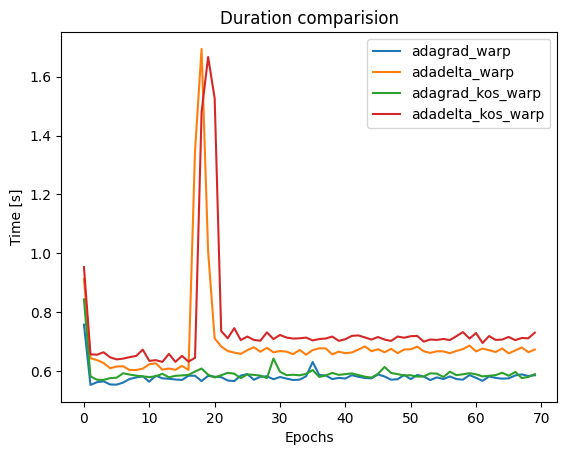

In [15]:
# Duration comparision
model_name = 'adagrad_bpr_model'
model_results_path = f'{RESULTS_PATH}/{model_name}'
version = get_newest_existing_model_version(model_results_path)
adagrad_bpr_model_duration = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl'))

model_name = 'adadelta_bpr_model'
adadelta_bpr_model_duration = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl'))

model_name = 'adagrad_warp_model'
adagrad_warp_model_duration = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl'))

model_name = 'adadelta_warp_model'
adadelta_warp_model_duration = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl'))

model_name = 'adagrad_kos_warp_model'
adagrad_kos_warp_model_duration = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl'))

model_name = 'adadelta_kos_warp_model'
adadelta_kos_warp_model_duration = np.array(unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl'))

x = np.arange(len(adagrad_warp_model_duration))
plt.title("Duration comparision")
plt.plot(x, adagrad_bpr_model_duration)
plt.plot(x, adadelta_bpr_model_duration)
plt.plot(x, adagrad_warp_model_duration)
plt.plot(x, adadelta_warp_model_duration)
plt.plot(x, adagrad_kos_warp_model_duration)
plt.plot(x, adadelta_kos_warp_model_duration)
plt.legend(['adagrad_bpr_model', 'adadelta_bpr_model', 'adagrad_warp', 'adadelta_warp', 'adagrad_kos_warp', 'adadelta_kos_warp'], loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Time [s]")
plt.show()

In [14]:
models_training_duration = {
    'Adagrad BPR model': sum(adagrad_bpr_model_duration),
    'Adadelta BPR model': sum(adadelta_bpr_model_duration),
    'Adagrad WARP model': sum(adagrad_warp_model_duration),
    'Adadelta WARP model': sum(adadelta_warp_model_duration),
    'Adagrad k-OS WARP model': sum(adagrad_kos_warp_model_duration),
    'Adadelta k-OS WARP model':sum(adadelta_kos_warp_model_duration),
}

df = pd.DataFrame().from_dict(
                        data=models_training_duration,
                        columns=['training duration [s]'],
                        orient='index'
                    ).sort_values(by=['training duration [s]'], ascending=False)

print(df)

                          training duration [s]
Adadelta BPR model                    71.490803
Adagrad BPR model                     52.209410
Adadelta k-OS WARP model              51.561497
Adadelta WARP model                   48.310231
Adagrad k-OS WARP model               41.357300
Adagrad WARP model                    40.530746
